In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from apyori import apriori

DataSetPath=input('enter data set path of csv file')
Data=pd.read_csv(DataSetPath)
Data.head()

In [ ]:
x=Data.iloc[:,[2,5]].values
inertias=[]
for i in range(1,11):
 Kmeans =KMeans(n_clusters=i)
 Kmeans.fit(x)
 inertias.append(Kmeans.inertia_)
plt.plot(inertias,marker='o')    
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [3]:
NumberOfCluster=int(input('enter number of cluster between 2 and 4'))
MinSupport=float(input('enter min support between 0.001 and 1'))
MinConfendence=float(input('enter min confidence between 0.001 and 1'))

enter number of cluster between 2 and 4 3
enter min support between 0.001 and 1 0.0045
enter min confidence between 0.001 and 1 0.2


In [4]:
Kmeans=KMeans(n_clusters=NumberOfCluster,init='k-means++')
N_Kmeans=Kmeans.fit_predict(x)
print(N_Kmeans)

[2 0 1 ... 1 1 0]


In [5]:
pd.concat([Data[Data.columns[2]],Data[Data.columns[4]],Data[Data.columns[5]],pd.DataFrame(N_Kmeans)],axis=1)

,total,customer,age,0
0,1612,Maged,60,2
1,509,Eman,23,0
2,2084,Rania,37,1
3,788,Rania,37,0
4,1182,Magdy,36,2
...,...,...,...,...
9830,2048,Farida,22,1
9831,1912,Adel,50,1
9832,2482,Farida,22,1
9833,2101,Adel,50,1


Text(0, 0.5, 'age')

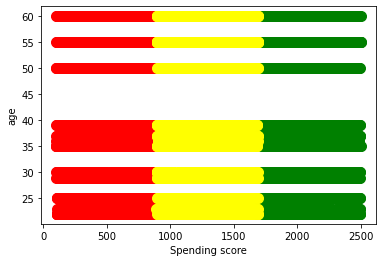

In [6]:
plt.scatter(x[N_Kmeans==0,0],x[N_Kmeans==0,1],s=100,c='red')
plt.scatter(x[N_Kmeans==1,0],x[N_Kmeans==1,1],s=100,c='green')
plt.scatter(x[N_Kmeans==2,0],x[N_Kmeans==2,1],s=100,c='yellow')
plt.scatter(x[N_Kmeans==3,0],x[N_Kmeans==3,1],s=100,c='black')
plt.xlabel("Spending score")
plt.ylabel("age")

In [7]:
records = []
for i in range(0, 9835):
    records.append([str(Data.values[i,j]) for j in range(0, 4)])
new_records=[]
temp=[]
for i in range(0,9835):
    for j in range(0,len(records[i])):
        if records[i][j]!='nan':
         temp.append(records[i][j])
    new_records.append(temp)
    temp=[]

del records
del temp

In [11]:
association_rules=apriori(new_records,min_support=MinSupport,min_confidence=MinConfendence,min_lift=3,min_length=2)
association_results=list(association_rules)
print(association_rules)
len(association_results)

<generator object apriori at 0x000002ED00054F90>


9

In [9]:
print(association_results[0])

RelationRecord(items=frozenset({'1', 'bottled beer'}), support=0.012201321809862735, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bottled beer'}), items_add=frozenset({'1'}), confidence=1.0, lift=3.7127217818044542)])


In [10]:

for item in association_results:
   
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

   
    print("Support: " + str(item[1]))

   

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: 1 -> bottled beer
Support: 0.012201321809862735
Confidence: 1.0
Lift: 3.7127217818044542
Rule: bottled water -> 1
Support: 0.00681240467717336
Confidence: 1.0
Lift: 3.7127217818044542
Rule: 1 -> canned beer
Support: 0.026436197254702594
Confidence: 1.0
Lift: 3.7127217818044542
Rule: newspapers -> 1
Support: 0.005490594814438231
Confidence: 1.0
Lift: 3.7127217818044542
Rule: other vegetables -> 1
Support: 0.00630401626842908
Confidence: 1.0
Lift: 3.7127217818044542
Rule: rolls/buns -> 1
Support: 0.011082867310625319
Confidence: 1.0
Lift: 3.7127217818044542
Rule: shopping bags -> 1
Support: 0.004880528723945094
Confidence: 1.0
Lift: 3.7127217818044542
Rule: soda -> 1
Support: 0.015861718352821557
Confidence: 1.0
Lift: 3.7127217818044542
Rule: whole milk -> 1
Support: 0.012302999491611592
Confidence: 1.0
Lift: 3.7127217818044542
